#Multiple Hypothesis Testing Simulations
###Independent t-tests with H0 ~ N(0,1) and H1~N(k,1)

##Importing libraries

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

##Setting up simulations

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of simulations
num_simulations = 10000

# Number of tests (comparisons)
num_tests = 10000  #Fix to a vlaue found in literature

# True effect size (common for all tests)
true_effect_size = 0.55

# Simulate data and conduct t-tests
p_values = []

for _ in range(num_simulations):
    # Simulate data with true effect size
    control_group = np.random.normal(0, 1, size=100)
    treatment_group = np.random.normal(true_effect_size, 1, size=100)

    # Conduct t-test
    p_value = sm.stats.ttest_ind(control_group, treatment_group)[1]
    p_values.append(p_value)

p_values[:10]

[6.744421577844149e-07,
 3.5545921250140815e-05,
 0.0006094680905980929,
 0.00040813617716395107,
 0.010282507192613092,
 0.0008068497794816965,
 0.0009343600514716188,
 0.1982816977818339,
 0.0010548502133202132,
 1.8235738391884249e-06]

In [ ]:
threshold = 0.05
significant_p =  [p for p in p_values if p < threshold]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)


Num. of significant p-values =  95


##FWER Correction Methods

###1. Bonferroni Correction

Num. of significant p-values =  6


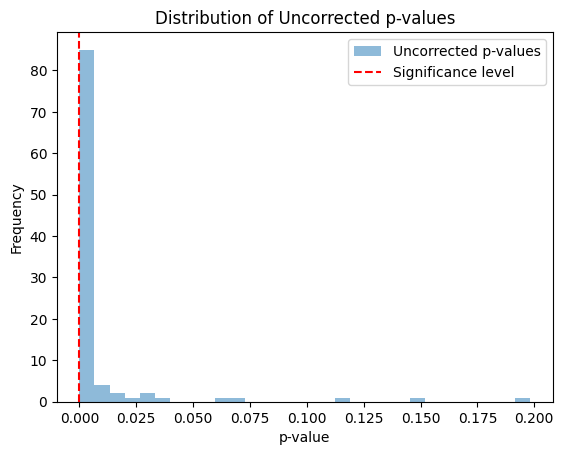

Proportion of rejected null hypotheses (uncorrected): 0.590
Corrected significance level (Bonferroni-corrected): 0.000


In [ ]:
# Bonferroni correction
alpha = 0.05
reject_null, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

bonf_p = corrected_p_values
threshold_bon = threshold/num_tests

significant_p =  [p for p in bonf_p if p < threshold_bon]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)

# Calculate the proportion of rejected null hypotheses
proportion_rejected = np.mean(reject_null)

# Plot the results
plt.hist(p_values, bins=30, alpha=0.5, label='Uncorrected p-values')
plt.axvline(x=threshold_bon, color='r', linestyle='--', label='Significance level')
plt.title('Distribution of Uncorrected p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Proportion of rejected null hypotheses (uncorrected): {proportion_rejected:.3f}")
print(f"Corrected significance level (Bonferroni-corrected): {alpha / num_tests:.3f}")

###2. Sidak Method

Num. of significant p-values =  6


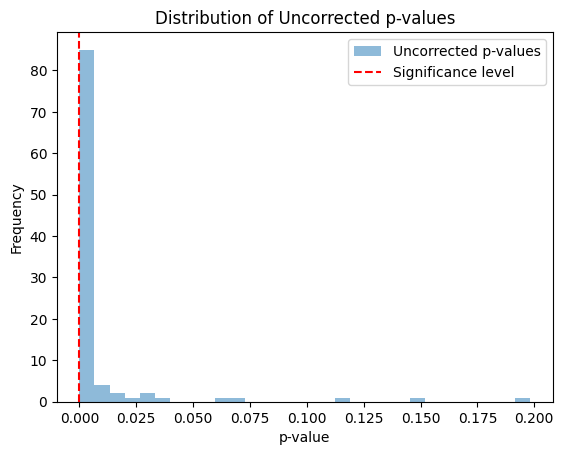

Proportion of rejected null hypotheses (uncorrected): 0.590
Corrected significance level (Sidak-corrected): 0.000


In [ ]:
# Sidak correction
alpha = 0.05
reject_null, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='sidak')

sidak_p = corrected_p_values
threshold_sidak = 1 - (1 - alpha) ** (1 / num_tests)

significant_p =  [p for p in sidak_p if p < threshold_sidak]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)

# Calculate the proportion of rejected null hypotheses
proportion_rejected = np.mean(reject_null)

# Plot the results
plt.hist(p_values, bins=30, alpha=0.5, label='Uncorrected p-values')
plt.axvline(x=threshold_sidak, color='r', linestyle='--', label='Significance level')
plt.title('Distribution of Uncorrected p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Proportion of rejected null hypotheses (uncorrected): {proportion_rejected:.3f}")
print(f"Corrected significance level (Sidak-corrected): {1 - (1 - alpha) ** (1 / num_tests):.3f}")

###Holm-Bonferroni Method

Num. of significant p-values =  75


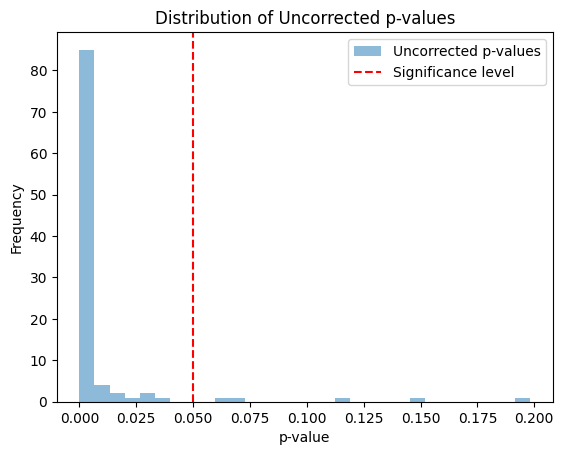

Proportion of rejected null hypotheses (uncorrected): 0.750
Corrected significance level (Holm-Bonferroni-corrected): 0.050


In [ ]:
# Holm-Bonferroni correction
alpha = 0.05
reject_null, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='holm')

holm_p = corrected_p_values
threshold_holm = alpha

significant_p =  [p for p in holm_p if p < threshold_holm]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)

# Calculate the proportion of rejected null hypotheses
proportion_rejected = np.mean(reject_null)

# Plot the results
plt.hist(p_values, bins=30, alpha=0.5, label='Uncorrected p-values')
plt.axvline(x=alpha, color='r', linestyle='--', label='Significance level')
plt.title('Distribution of Uncorrected p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Proportion of rejected null hypotheses (uncorrected): {proportion_rejected:.3f}")
print(f"Corrected significance level (Holm-Bonferroni-corrected): {alpha:.3f}")

##FDR correction methods

### 1. Benjamini- Hochberg Method

Num. of significant p-values =  95


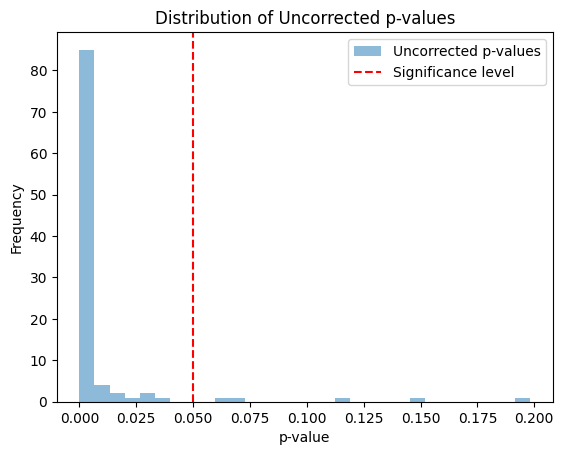

Proportion of rejected null hypotheses (uncorrected): 0.950
Corrected significance level (Benjamini-Hochberg FDR-corrected): 0.050


In [ ]:
# Benjamini-Hochberg correction
alpha = 0.05
reject_null, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

bh_p = corrected_p_values
threshold_bh = alpha

significant_p =  [p for p in bh_p if p < threshold_bh]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)

# Calculate the proportion of rejected null hypotheses
proportion_rejected = np.mean(reject_null)

# Plot the results
plt.hist(p_values, bins=30, alpha=0.5, label='Uncorrected p-values')
plt.axvline(x=alpha, color='r', linestyle='--', label='Significance level')
plt.title('Distribution of Uncorrected p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Proportion of rejected null hypotheses (uncorrected): {proportion_rejected:.3f}")
print(f"Corrected significance level (Benjamini-Hochberg FDR-corrected): {alpha:.3f}")

###2. Storey's Q value

Num. of significant p-values =  95


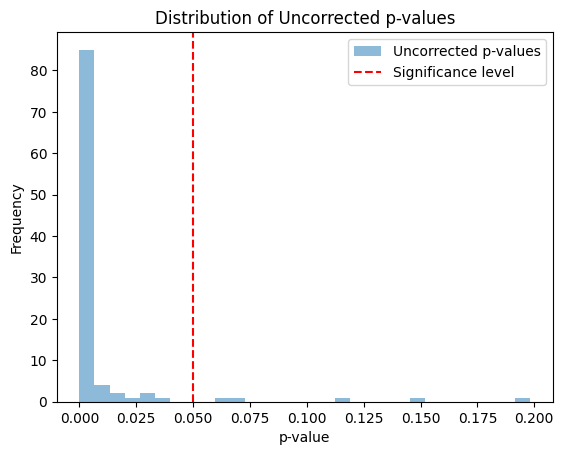

Proportion of rejected null hypotheses (uncorrected): 0.950
Q-values (Storey's method):
[6.13129234e-06 1.03829242e-04 9.67409668e-04 7.44897819e-04
 1.16846673e-02 1.15409716e-03 1.27994528e-03 1.98281698e-01
 1.42547326e-03 1.13973365e-05 2.74305828e-05 2.91014388e-04
 8.06877598e-04 4.69097310e-05 9.95675474e-05 1.20313737e-03
 1.22606667e-03 1.13613835e-04 2.95548833e-02 8.09370922e-07
 1.37208810e-04 1.58805158e-04 1.23813135e-05 7.44897819e-04
 1.08143078e-05 8.98254959e-04 1.15521453e-01 2.49937275e-05
 3.61811263e-03 7.64373150e-07 7.36305857e-03 3.52012058e-04
 1.58354844e-06 1.23813135e-05 7.42390078e-06 7.36368858e-03
 2.89399722e-04 4.92552595e-04 8.61256898e-06 7.42390078e-06
 5.32718643e-04 1.03829242e-04 3.85825848e-05 7.89830036e-04
 2.73268789e-07 1.70682714e-05 7.64373150e-07 1.03829242e-04
 3.56458495e-03 1.03201453e-04 9.80684018e-04 8.97031053e-05
 1.14437507e-03 4.98137081e-03 5.06209086e-05 5.36645692e-04
 7.27111705e-03 1.76895115e-07 7.68246434e-04 9.05812695e-

In [ ]:
from statsmodels.stats.multitest import fdrcorrection

# Storey's q-value correction
alpha = 0.05
reject_null, q_values= fdrcorrection(p_values, alpha=alpha)

storey_q = q_values
threshold_q = alpha

significant_p =  [p for p in storey_q if p < threshold_q]
sig_p= len(significant_p)

print("Num. of significant p-values = ",sig_p)




# Calculate the proportion of rejected null hypotheses
proportion_rejected = np.mean(reject_null)

# Plot the results
plt.hist(p_values, bins=30, alpha=0.5, label='Uncorrected p-values')
plt.axvline(x=alpha, color='r', linestyle='--', label='Significance level')
plt.title('Distribution of Uncorrected p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Proportion of rejected null hypotheses (uncorrected): {proportion_rejected:.3f}")
print("Q-values (Storey's method):")
print(q_values)